# **BioInformatics and Machine Learning Internship Test**



# **Introduction:**

Exon and intron research is crucial for understanding gene expression, decoding genetic information, and unraveling the complexities of transcriptomics in the fields of bioinformatics and machine learning. The study of these genetic components is the focus of this research, which uses a large dataset to tackle important tasks including determining the length of introns, identifying transcript variety, calculating exon statistics, and adjusting coordinates. This project delivers useful insights for researchers in genetics, genomics, and computational biology through effective Python-based programming, making contributions to developments in gene control and its effects on health and illness.

In [25]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics

df = pd.read_csv('exgr_test.csv')
df.head()

,transcript_id,transcript_name,sequence_names,start,end,width,strand,exon_id,exon_name,rank
0,1,ENST00000456328.2,chr1,11869,12227,359,+,1,ENSE00002234944.1,1
1,1,ENST00000456328.2,chr1,12613,12721,109,+,5,ENSE00003582793.1,2
2,1,ENST00000456328.2,chr1,13221,14409,1189,+,8,ENSE00002312635.1,3
3,2,ENST00000450305.2,chr1,12010,12057,48,+,2,ENSE00001948541.1,1
4,2,ENST00000450305.2,chr1,12179,12227,49,+,3,ENSE00001671638.2,2


In [26]:
# Checking the shape of the dataset
df.shape

(1460986, 10)

In [27]:
# Checking the description of the dataset
df.describe()

,transcript_id,start,end,width,exon_id,rank
count,1.460986e+06,1.460986e+06,1.460986e+06,1.460986e+06,1.460986e+06,1.460986e+06
mean,1.154600e+05,7.575526e+07,7.575552e+07,2.629931e+02,3.769809e+05,7.368349e+00
std,6.775761e+04,5.619512e+07,5.619512e+07,6.708444e+02,2.192086e+05,1.028987e+01
min,1.000000e+00,5.770000e+02,6.470000e+02,1.000000e+00,1.000000e+00,1.000000e+00
25%,5.576100e+04,3.218025e+07,3.218055e+07,8.900000e+01,1.852562e+05,2.000000e+00
50%,1.151000e+05,6.303017e+07,6.303022e+07,1.300000e+02,3.754110e+05,4.000000e+00
75%,1.734000e+05,1.114868e+08,1.114872e+08,2.000000e+02,5.646888e+05,9.000000e+00
max,2.344850e+05,2.489366e+08,2.489370e+08,3.473000e+05,7.605490e+05,3.630000e+02


In [28]:
# Checking the null count in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460986 entries, 0 to 1460985
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   transcript_id    1460986 non-null  int64 
 1   transcript_name  1460986 non-null  object
 2   sequence_names   1460986 non-null  object
 3   start            1460986 non-null  int64 
 4   end              1460986 non-null  int64 
 5   width            1460986 non-null  int64 
 6   strand           1460986 non-null  object
 7   exon_id          1460986 non-null  int64 
 8   exon_name        1460986 non-null  object
 9   rank             1460986 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 111.5+ MB


<Axes: xlabel='strand', ylabel='count'>

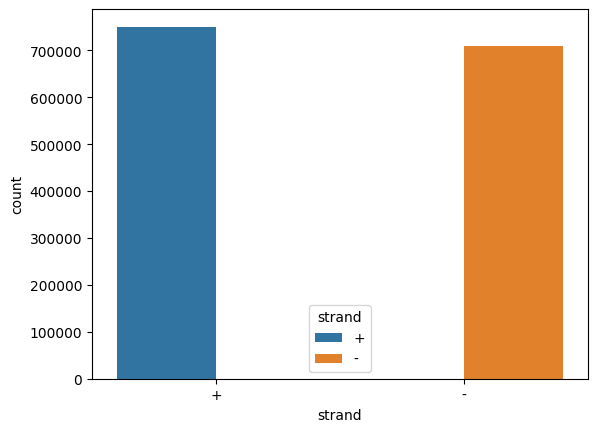

In [29]:
# Displaying number of unique strands and their count
sns.countplot(x='strand', hue='strand', data=df)

In [30]:
# Checking if any columns contain null value
df.isnull().sum()

transcript_id      0
transcript_name    0
sequence_names     0
start              0
end                0
width              0
strand             0
exon_id            0
exon_name          0
rank               0
dtype: int64

# **Task 1: How many unique transcripts are there?**

In [31]:
# Using nunique function to check how many unique functions are present
x = df['transcript_name'].nunique()
y = df['transcript_id'].nunique()
print(f'The number of unique transcripts are: {y}')

The number of unique transcripts are: 234485


# **Task 2: How many unique exons are there?**

In [32]:
# Checking unique exons in the dataset
z = df['exon_id'].nunique()
print(f'Number of unique exons are: {z}')

Number of unique exons are: 760549


# **Task 3: What is the average length of an exon? What is the median length?**

In [33]:
# Calculating the average length of an exon
avg = df['width'].mean()
print(f'The average length of an exon is: {avg}')

The average length of an exon is: 262.9930635885628


In [34]:
# alternative method to find average length of exon
avg = df['width'].sum()/len(df['width'])
print(f'The average length of an exon is: {avg}')

The average length of an exon is: 262.9930635885628


In [35]:
#Using the default method to calculate median
median = df['width'].median()
print(f'The median length of an exon is: {median}')

The median length of an exon is: 130.0


In [36]:
import statistics

median = statistics.median(df['width'])
median

130.0

In [37]:
#Alternative method to calculate median
def calculate_median(values):
    sorted_values = sorted(values)
    n = len(sorted_values)
    if n % 2 == 0:
        median = (sorted_values[n // 2 - 1] + sorted_values[n // 2]) / 2
    else:
        median = sorted_values[n // 2]
    return median

# Calculate the median using the custom function
median = calculate_median(df['width'])

print(f"Median Length: {median}")

Median Length: 130.0


A dataset contains all the information about transcript_id,	transcript_name,	sequence_names,	start,	end,	width,	strand,	exon_id,	exon_name,	rank.

where:
1. transcript_id: id of the transcript
2. transcript_name: name of the transcript
3. sequence_name: the chromosome ID
4. start: starting coordinate of an exon
5. end: ending coordinate of an exon
6. width: width of an exon = (end-start)+1
7. strand: + implies exons are ordered with increasing coordinate, - implies exons are ordered with decreasing coordinate
8. exon_id: ID of an exon
9. exon_name: name of an exon
10. rank: position of the exon in the transcript

# **Task 4: Find the length of the introns between the exons.(Length must be a positive integer). For the first exon in the transcript intron length is 0. For the (n)th intron in the transcript intron length corresponds to the intron between the (n)th and (n-1)th exon. There is no intron after the last exon in the transcript(to the right)**

In [38]:
# Sort the DataFrame by transcript_id and rank
df.sort_values(by=['transcript_id', 'rank'], inplace=True)

# Calculate intron lengths based on strand direction
df['intron'] = 0
df['intron'][df['rank'] > 1] = df['start'] - df['end'].shift(1)
df['intron'] = np.where(df['strand'] == '-', -df['intron'], abs(df['intron']))

# Reset the intron length for the first exon in each transcript
df['intron'][df['transcript_id'] != df['transcript_id'].shift()] = 0

# Displaying the updated DataFrame with the "introns" column
df


<ipython-input-38-8195101c5b64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intron'][df['rank'] > 1] = df['start'] - df['end'].shift(1)
<ipython-input-38-8195101c5b64>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intron'][df['transcript_id'] != df['transcript_id'].shift()] = 0


,transcript_id,transcript_name,sequence_names,start,end,width,strand,exon_id,exon_name,rank,intron
0,1,ENST00000456328.2,chr1,11869,12227,359,+,1,ENSE00002234944.1,1,0
1,1,ENST00000456328.2,chr1,12613,12721,109,+,5,ENSE00003582793.1,2,386
2,1,ENST00000456328.2,chr1,13221,14409,1189,+,8,ENSE00002312635.1,3,500
3,2,ENST00000450305.2,chr1,12010,12057,48,+,2,ENSE00001948541.1,1,0
4,2,ENST00000450305.2,chr1,12179,12227,49,+,3,ENSE00001671638.2,2,122
...,...,...,...,...,...,...,...,...,...,...,...
1460981,234481,ENST00000387409.1,chrM,5826,5891,66,-,760545,ENSE00001544488.1,1,0
1460982,234482,ENST00000387416.2,chrM,7446,7514,69,-,760546,ENSE00001544487.2,1,0
1460983,234483,ENST00000361681.2,chrM,14149,14673,525,-,760547,ENSE00001434974.2,1,0
1460984,234484,ENST00000387459.1,chrM,14674,14742,69,-,760548,ENSE00001544476.1,1,0


# **Bonus Task**

L1, L2, U1, U2 are coordinates.

L1 is 100 units of length before Sj left of an exon.
L2 is 100 units of length after Sj left of an exon.
U1 is 100 units of length before Sj right of an exon.
U2 is 100 units of length after Sj right of an exon.
Sj is a splice junction which is start and end coordinates of an exon.
The 'L' regions and the 'U' regions should not overlap. If the exon or intron is too short(<200 units) 100 should be replaced by half the length of the exon or intron.

Note: L1, L2, U1, U2 should always be integers and not overlap. Floor or ceiling accordingly.

Task: Make 4 columns with L1, L2, U1, U2 for each exon. Remember leftmost exon of a transcript will have L1=0 and rightmost exon of a transcript will have U2=0.

In [39]:
# Sort the DataFrame by transcript_id and rank
df.sort_values(by=['transcript_id', 'rank'], inplace=True)

# Calculate L1, L2, U1, U2 based on exon width, strand, start, and end coordinates
df['half_width'] = df['width'] // 2
df['L1'] = df['half_width'].clip(upper=100)
df['L2'] = df['half_width'].clip(upper=100)
df['U1'] = df['half_width'].clip(upper=100)
df['U2'] = df['half_width'].clip(upper=100)

# Replace L1, L2, U1, U2 with half the length of exon or intron if less than 200 units
df.loc[df['half_width'] < 100, ['L1', 'L2', 'U1', 'U2']] = df['half_width']

# Adjust coordinates for '-' strand
df.loc[df['strand'] == '-', ['L1', 'L2', 'U1', 'U2']] = df.loc[df['strand'] == '-', ['U2', 'U1', 'L2', 'L1']].values

# Set L1=0 for leftmost exon and U2=0 for rightmost exon in each transcript
df.loc[df.groupby('transcript_id')['rank'].idxmin(), 'L1'] = 0
df.loc[df.groupby('transcript_id')['rank'].idxmax(), 'U2'] = 0

# Drop the 'half_width' column if you don't need it anymore
df.drop('half_width', axis=1, inplace=True)

# Ensure that L1, L2, U1, U2 are integers
df['L1'] = df['L1'].astype(int)
df['L2'] = df['L2'].astype(int)
df['U1'] = df['U1'].astype(int)
df['U2'] = df['U2'].astype(int)

# Display the updated DataFrame with the new columns
df


,transcript_id,transcript_name,sequence_names,start,end,width,strand,exon_id,exon_name,rank,intron,L1,L2,U1,U2
0,1,ENST00000456328.2,chr1,11869,12227,359,+,1,ENSE00002234944.1,1,0,0,100,100,100
1,1,ENST00000456328.2,chr1,12613,12721,109,+,5,ENSE00003582793.1,2,386,54,54,54,54
2,1,ENST00000456328.2,chr1,13221,14409,1189,+,8,ENSE00002312635.1,3,500,100,100,100,0
3,2,ENST00000450305.2,chr1,12010,12057,48,+,2,ENSE00001948541.1,1,0,0,24,24,24
4,2,ENST00000450305.2,chr1,12179,12227,49,+,3,ENSE00001671638.2,2,122,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460981,234481,ENST00000387409.1,chrM,5826,5891,66,-,760545,ENSE00001544488.1,1,0,0,33,33,0
1460982,234482,ENST00000387416.2,chrM,7446,7514,69,-,760546,ENSE00001544487.2,1,0,0,34,34,0
1460983,234483,ENST00000361681.2,chrM,14149,14673,525,-,760547,ENSE00001434974.2,1,0,0,100,100,0
1460984,234484,ENST00000387459.1,chrM,14674,14742,69,-,760548,ENSE00001544476.1,1,0,0,34,34,0
